In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data

In [97]:
df = pd.read_csv('mymoviedb.csv',lineterminator = '\n')

In [98]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       2447 non-null   object 
 1   Title              2447 non-null   object 
 2   Overview           2447 non-null   object 
 3   Popularity         2447 non-null   float64
 4   Vote_Count         2447 non-null   int64  
 5   Vote_Average       2447 non-null   float64
 6   Original_Language  2447 non-null   object 
 7   Genre              2447 non-null   object 
 8   Poster_Url         2447 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 172.2+ KB


In [100]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [101]:
df.duplicated().sum()

0

In [102]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,2447.000000,2447.000000,2447.000000
mean,101.913947,3146.480180,6.625868
std,206.080884,4313.779159,1.102282
min,35.266000,0.000000,0.000000
25%,43.347500,227.000000,6.100000
50%,57.705000,1298.000000,6.700000
75%,92.618000,4559.000000,7.300000
max,5083.954000,31077.000000,9.100000


# Exploration Summary

 We have a dataframe consisting of 2447 rows and 9 coloums.\
 our dataset looks a bit tidy with no Nans nor duplicated values.\
 release_date Column needs to be casted into date time and to extract only the year value.\
 Overview, Oringinal_Language and Poster-Url wouldn't be so useful during analysis, so we will drop them.\
 There is noticable outliers in Popularity column.\
 Vote_Average better be categorised for proper analysis.\
 Genre column has coma saperated values and white spaces that needs to be handled and casted into category.


In [104]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtype)

datetime64[ns]


In [105]:
df['Release_Date'] = df['Release_Date'].dt.year

df['Release_Date'].dtypes

dtype('int32')

In [106]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Droppig the columns 

In [108]:
cols = ['Overview','Original_Language','Poster_Url']

In [109]:
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [110]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


# Categorizing Vote_Average column 

 We would cut the Vote_Average values and make 4 categories: popular, average, beloew_avg, not_popular to describe it more using catigorize_col() function   

In [111]:
def categorize_col(df, col, labels):

    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    df[col] = pd.cut(df[col], edges , labels = labels, duplicates = 'drop')
    return df

In [112]:
labels = ['not_popular','below_avg', 'average', 'popular']

categorize_col(df, 'Vote_Average', labels)

df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [113]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [114]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    622
below_avg      621
average        601
popular        581
Name: count, dtype: int64

In [115]:
df.dropna(inplace=True)

df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [116]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


# We would split genres into a list and then explode our dataframe to have only one genre per row for each movie.

In [117]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


# Casting column into category

In [ ]:


df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6713 entries, 0 to 6712
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  6713 non-null   int32   
 1   Title         6713 non-null   object  
 2   Popularity    6713 non-null   float64 
 3   Vote_Count    6713 non-null   int64   
 4   Vote_Average  6713 non-null   category
 5   Genre         6713 non-null   category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 197.7+ KB


In [120]:
df.nunique()

Release_Date      74
Title           2378
Popularity      2379
Vote_Count      1835
Vote_Average       4
Genre             19
dtype: int64

In [121]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


# Data Visualization

In [122]:
sns.set_style('whitegrid')

# What is the most frequent genre of movies released on Netflix?

In [123]:
df['Genre'].describe()

count       6713
unique        19
top       Action
freq         857
Name: Genre, dtype: object

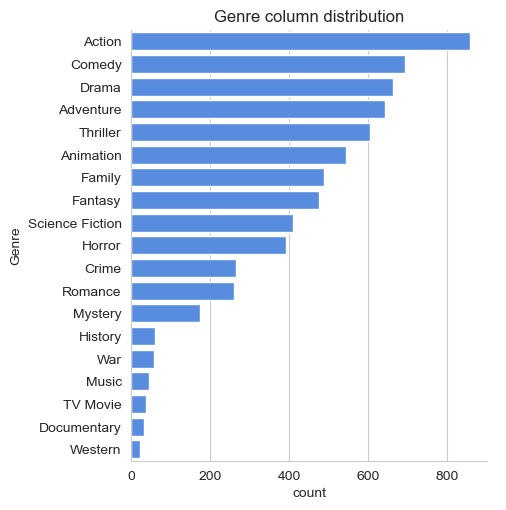

In [124]:
sns.catplot(y = 'Genre', data = df, kind = 'count',
            order = df['Genre'].value_counts().index,
            color = '#4287f5')
plt.title("Genre column distribution")
plt.show()

# Which has highest votes in vote avg column?

In [125]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


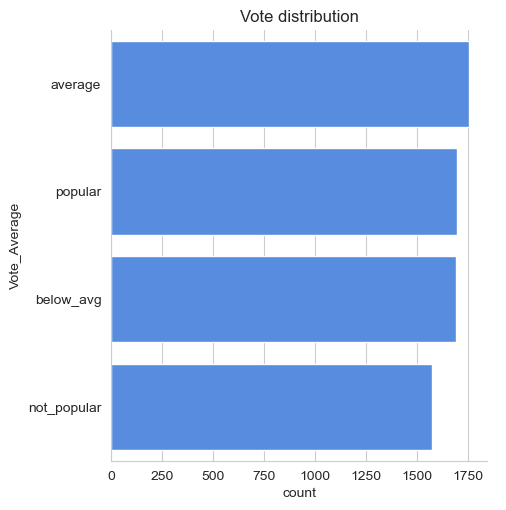

In [135]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
            order = df['Vote_Average'].value_counts().index,
            color = '#4287f5')
plt.title('Vote distribution')
plt.show()
          

# What movie got the highest popularity? What's its genre?

In [138]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


In [139]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# What movie got the lowest popularity? What is its genre?

In [141]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
6709,1991,An American Tail: Fievel Goes West,35.266,588,below_avg,Adventure
6710,1991,An American Tail: Fievel Goes West,35.266,588,below_avg,Animation
6711,1991,An American Tail: Fievel Goes West,35.266,588,below_avg,Family
6712,1991,An American Tail: Fievel Goes West,35.266,588,below_avg,Western


# which year has the most filmmed movies?

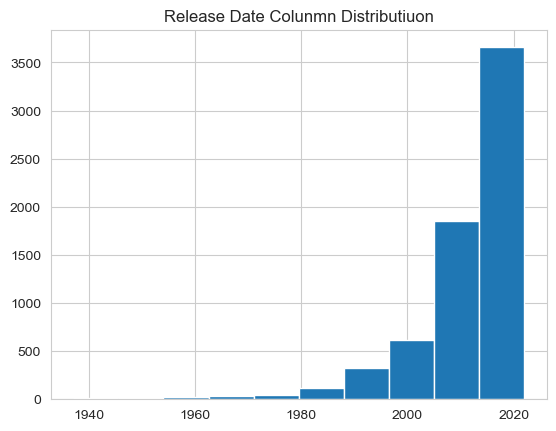

In [143]:
df['Release_Date'].hist()
plt.title("Release Date Colunmn Distributiuon")
plt.show()

# Conclusion

Q1.  What is the most frequent genre in the dataset?\
    Action genre is the most frequent genre in our dataset.

Q2. What genre has highest votes?\
    Spider-Man: No Way Home has the highest votes that is 8940 and genre are Action,Adventure,Science Fiction.

Q3. What movie got the highest popularity? what's its genre?\
    Spider-Man: No Way Home got the highest popularity and It's popularity is 5083.954 and vote count is 8940 and genres are Action, Advanture. 

Q4. what movie got the lowest popularity? what's its genre?\
    An American Tail: Fievel Goes West	has the lowest popularity , with popularity of 35.266 and Vote Count is 588, It's genres are Adventure,Animation,Family,Western. 

Q5. What year has the most filmmed movies?\
    Year 2020 has the highest filmming rate in our dataset.





